In [20]:
# read particle data from a file and plot it
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import sys
from IPython.display import HTML

sys.path.append('./..')

# read data from file
# each line is the position of a particle at a given time
# and between different time steps there is a blank line
# and plot it in an animation
# Function to read particle data from file
def read_particle_data(filename):
    with open(filename, 'r') as file:
        data = file.read().strip().split('\n\n')
        
    particle_data = []
    for block in data:
        block_data = []
        for line in block.split('\n'):
            try:
                block_data.append(list(map(float, line.split(" ")))[:2])
            except ValueError:
                print(f"Error reading line: {line}")
                continue
        particle_data.append(np.array(block_data))
    return particle_data

# Function to update the plot
def update(frame):
    plt.clf()
    plt.scatter(particle_data[frame][:, 0], particle_data[frame][:, 1])
    plt.xlim(-10, 100)
    plt.ylim(-10, 100)
    plt.title(f'Time step: {frame * 10}')

particle_data = read_particle_data('output.txt')
print(len(particle_data))

10


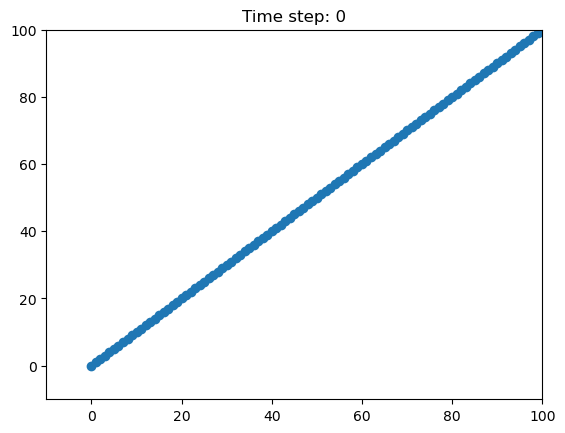

In [21]:
fig = plt.figure()
# Create animation
ani = FuncAnimation(fig, update, frames=range(0, len(particle_data), 1), repeat=False)

HTML(ani.to_jshtml())

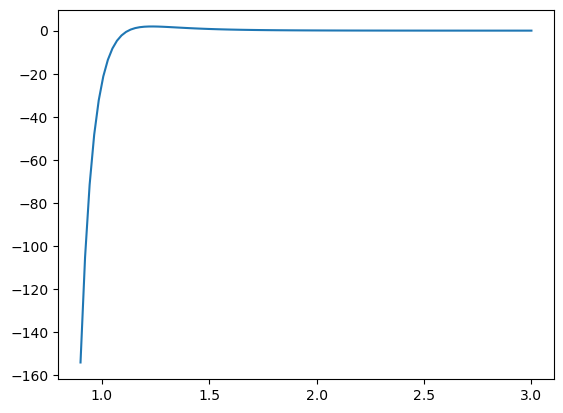

In [3]:
# auto pair_force = [eps, sigma](double r) {
#         double sigma6 = sigma * sigma * sigma * sigma * sigma * sigma;
#         double sigma12 = sigma6 * sigma6;

#         double r6 = r * r * r * r * r * r;
#         double r8 = r6 * r * r;
#         return 4 * eps * (-12 * sigma12 / (r8 * r6) + 6 * sigma6 / (r8));
#     };

pair_force = lambda eps, sigma, r: 4 * eps * (-12 * sigma**12 / (r**14) + 6 * sigma**6 / (r**8))
# pair_force(1, 1, 4)
# draw the picture of the pair force
r = np.linspace(0.9, 3, 100)
plt.plot(r, pair_force(1, 1, r))
plt.show()